# **Progetto di Digital Signal & Image Management**

## **Parte 1 - Audio recognition- DEMO**


*2020/2021*

Peracchi Marco 800578

Uccheddu Christian 800428

In [34]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav
import IPython.display as ipd
import librosa
import re
#import seaborn as sns
import sounddevice as sd

import matplotlib.pyplot as plt

import pandas as pd

import pickle

#import librosa.display
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import mobilenet
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'requests'

In [27]:
duration = 7 # (seconds)
rec_rate = 44100
signal = sd.rec(int(duration * rec_rate), samplerate=rec_rate, channels=1, blocking=True)

In [28]:
signal

array([[ 0.00369263],
       [-0.00064087],
       [-0.00689697],
       ...,
       [-0.04943848],
       [-0.04818726],
       [-0.04714966]], dtype=float32)

In [30]:
prova = signal[:,0]

In [31]:
ipd.Audio(prova, rate=rec_rate)

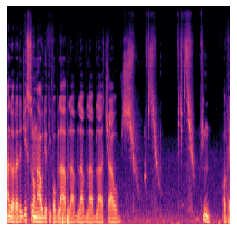

In [45]:
spect = librosa.feature.melspectrogram(y=prova, n_mels=128)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S_dB = librosa.power_to_db(spect, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.savefig("single/test/"+"demo.png", dpi = 100)

In [4]:
single_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= mobilenet.preprocess_input)

single_generator = single_processing.flow_from_directory("single",
                                    target_size = (224, 224),
                                    color_mode = "rgb",
                                    batch_size = 1,
                                    class_mode = "categorical",
                                    shuffle = False,
                                    seed = 1)
test,label_test = next(single_generator)

Found 1 images belonging to 1 classes.


In [5]:
model_1 = tf.keras.models.load_model('modello_audio')

In [6]:
loaded_model = pickle.load(open("logistic_audio.sav", 'rb'))

In [7]:
model_1

In [8]:
test_features = model_1.predict(test)
test_features = test_features.reshape(test_features.shape[0],
                                      test_features.shape[1]*test_features.shape[2]*test_features.shape[3])

In [9]:
pred_finali = loaded_model.predict(test_features)

In [10]:
pred_finali

array([1], dtype=int64)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_finali]

predictions